In [2]:
import pandas as pd
import seaborn as sb
import math
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


### Wage data

In [66]:
df_wage = pd.read_csv("../Notebooks/Data/Wage.csv")

In [67]:
df_wage.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [69]:
# df_wage.education = pd.Categorical(df_wage.education,categories=sorted(df_wage.education.unique()),ordered=True)
df_wage["education"] = df_wage["education"].apply(lambda x: int(x[0]))

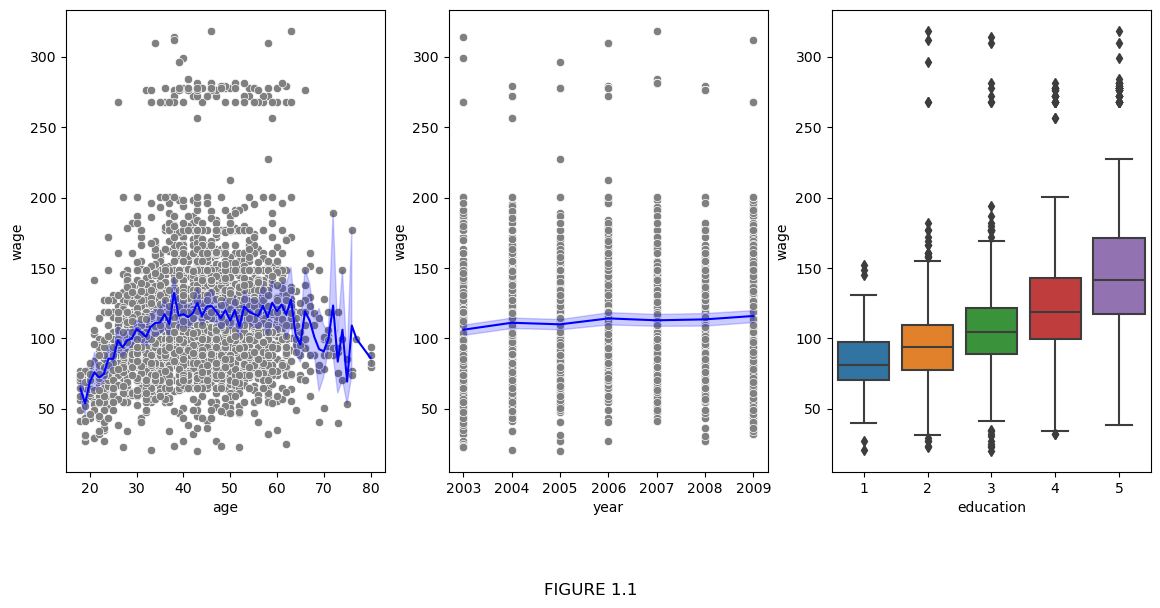

In [70]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(14,6))
axes = axes.flatten()
_ = sb.scatterplot(data=df_wage,x="age",y="wage", ax= axes[0], c="gray")
_ = sb.lineplot(data=df_wage, x="age",y="wage", estimator="mean",c='blue', ax=axes[0])
_ = sb.scatterplot(data=df_wage,x="year",y="wage", ax= axes[1], c="gray")
_ = sb.lineplot(data=df_wage, x="year",y="wage", estimator="mean",c='blue', ax=axes[1])
_ = sb.boxplot(data=df_wage,x="education",y="wage",ax=axes[2])
_ = fig.supxlabel("FIGURE 1.1",y=-0.1)

### Smarket data

In [11]:
df_sm = pd.read_csv("../Notebooks/Data/Smarket.csv")

In [12]:
df_sm.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [15]:
df_sm.shape # ~52*5*5=1300 market days in 5 years

(1250, 10)

In [20]:
df_sm=df_sm.rename(columns={"Unnamed: 0": "day_id"})

In [40]:
df_sm1 = pd.concat([df_sm,df_sm.shift(1).rename(columns={c:c+"_1"for c in df_sm.columns})], axis = 1)
df_sm2 = pd.concat([df_sm,df_sm.shift(2).rename(columns={c:c+"_1"for c in df_sm.columns})], axis = 1)
df_sm3 = pd.concat([df_sm,df_sm.shift(3).rename(columns={c:c+"_1"for c in df_sm.columns})], axis = 1)

In [41]:
# df_sm1["pct_change"] = (df_sm1["Today"]-df_sm1["Today_1"])*100/df_sm1["Today_1"]

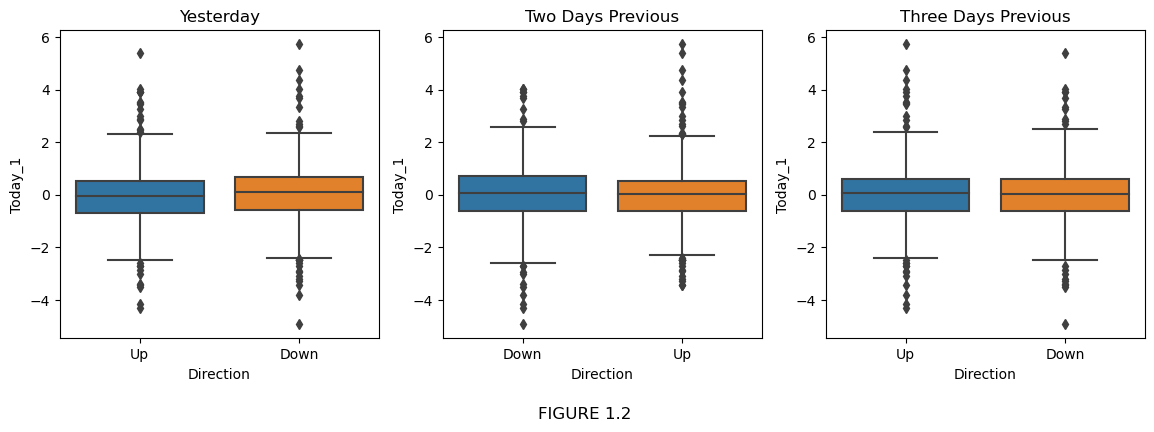

In [61]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(14,4))
axes = axes.flatten()
sb.boxplot(data=df_sm1.dropna(),x="Direction",y="Today_1",ax=axes[0])
_ = axes[0].set_title("Yesterday")
sb.boxplot(data=df_sm2.dropna(),x="Direction",y="Today_1",ax=axes[1])
_ = axes[1].set_title("Two Days Previous")
sb.boxplot(data=df_sm3.dropna(),x="Direction",y="Today_1",ax=axes[2])
_ = axes[2].set_title("Three Days Previous")
_ = fig.supxlabel("FIGURE 1.2",y=-0.1)

### Gene Expression Data

In [72]:
df_ged = pd.read_csv("../Notebooks/Data/NCI60_X.csv")

In [73]:
df_ged.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
